In [120]:
import json

In [1]:
import json

# Load data from the JSON file
with open('550w.json', 'r') as f:
    data = json.load(f)

# Extract main bounding box
main_box_data = data['boundingBox']
main_box = [
    main_box_data['sw']['latitude'],
    main_box_data['sw']['longitude'],
    main_box_data['ne']['latitude'],
    main_box_data['ne']['longitude']
]

# Extract solar panel data
solarPotential_data = data['solarPotential']
solar_panels_data = solarPotential_data.get('solarPanels', [])

# Print the number of solar panels
#print(f"Number of solar panels: {len(solar_panels_data)}")

# Extract roof segment statistics
roofSegmentStats_data = solarPotential_data.get('roofSegmentStats', [])

bounding_box_data = data['boundingBox']

# Extract heights of each sample and store in a list
sample_heights = []
for i, segment in enumerate(roofSegmentStats_data):
    height = segment.get('planeHeightAtCenterMeters', None)
    if height is not None:
        sample_heights.append(height)

# Extract sample boxes
sample_boxes = []
for sample in roofSegmentStats_data:
    box = sample.get('boundingBox', {})
    sw = box.get('sw', {})
    ne = box.get('ne', {})
    sample_box = [
        sw.get('latitude', None),
        sw.get('longitude', None),
        ne.get('latitude', None),
        ne.get('longitude', None)
    ]
    sample_boxes.append(sample_box)

# Dimensions of a single solar panel in inches
panel_width = 100
panel_height = 100

In [121]:
with open('50Q.json', 'r') as f:
    data = json.load(f)

In [122]:
for key, value in data.items():
    print(f"Key: {key}, Value Type: {type(value)}")

Key: name, Value Type: <class 'str'>
Key: center, Value Type: <class 'dict'>
Key: imageryDate, Value Type: <class 'dict'>
Key: postalCode, Value Type: <class 'str'>
Key: administrativeArea, Value Type: <class 'str'>
Key: statisticalArea, Value Type: <class 'str'>
Key: regionCode, Value Type: <class 'str'>
Key: solarPotential, Value Type: <class 'dict'>
Key: boundingBox, Value Type: <class 'dict'>
Key: imageryQuality, Value Type: <class 'str'>
Key: imageryProcessedDate, Value Type: <class 'dict'>


In [123]:
bounding_box_data = data['boundingBox']
bounding_box_structure = {key: type(value).__name__ for key, value in bounding_box_data.items()}
print(bounding_box_structure)

{'sw': 'dict', 'ne': 'dict'}


In [2]:
sw_data = bounding_box_data['sw']
ne_data = bounding_box_data['ne']
sw_structure = {key: type(value).__name__ for key, value in sw_data.items()}
ne_structure = {key: type(value).__name__ for key, value in ne_data.items()}

sw_data = bounding_box_data['sw']
ne_data = bounding_box_data['ne']
sw_lat, sw_long = sw_data['latitude'], sw_data['longitude']
ne_lat, ne_long = ne_data['latitude'], ne_data['longitude']
print(f"SW: ({sw_lat}, {sw_long}), NE: ({ne_lat}, {ne_long})")

SW: (32.7500937, -117.16079260000001), NE: (32.750606499999996, -117.1598182)


In [3]:
import folium
import math

# Function to rotate a point
def rotate_point(x, y, angle_degrees, cx, cy):
    angle_radians = math.radians(angle_degrees)
    dx = x - cx
    dy = y - cy
    rotated_dx = dx * math.cos(angle_radians) - dy * math.sin(angle_radians)
    rotated_dy = dx * math.sin(angle_radians) + dy * math.cos(angle_radians)
    return cx + rotated_dx, cy + rotated_dy

# Calculate the midpoint of the bounding box
mid_lat, mid_long = (sw_lat + ne_lat) / 2, (sw_long + ne_long) / 2

# Calculate scaling factor based on latitude
scale_factor = math.cos(math.radians(mid_lat))

# Adjust the deltas based on the scaling factor
scaled_delta_lat = (ne_lat - sw_lat) / scale_factor
scaled_delta_long = ne_long - sw_long

# Check if rotation is needed
rotation_needed = abs(scaled_delta_lat - scaled_delta_long) > 0.01  # Set a suitable threshold

# Initialize points to original coordinates
rotated_sw = (sw_lat, sw_long)
rotated_ne = (ne_lat, ne_long)
rotated_se = (ne_lat, sw_long)
rotated_nw = (sw_lat, ne_long)

if rotation_needed:
    # Calculate the angle of rotation based on the adjusted deltas
    angle_degrees = math.degrees(math.atan2(scaled_delta_lat, scaled_delta_long))

    # Rotate each corner of the bounding box
    rotated_sw = rotate_point(sw_lat / scale_factor, sw_long, angle_degrees, mid_lat / scale_factor, mid_long)
    rotated_ne = rotate_point(ne_lat / scale_factor, ne_long, angle_degrees, mid_lat / scale_factor, mid_long)
    rotated_se = rotate_point(ne_lat / scale_factor, sw_long, angle_degrees, mid_lat / scale_factor, mid_long)
    rotated_nw = rotate_point(sw_lat / scale_factor, ne_long, angle_degrees, mid_lat / scale_factor, mid_long)

    # Rescale the rotated coordinates back to the original scale
    rotated_sw = (rotated_sw[0] * scale_factor, rotated_sw[1])
    rotated_ne = (rotated_ne[0] * scale_factor, rotated_ne[1])
    rotated_se = (rotated_se[0] * scale_factor, rotated_se[1])
    rotated_nw = (rotated_nw[0] * scale_factor, rotated_nw[1])

# Initialize the folium map centered around the bounding box
zoom_level = 6  # Adjust as needed
m = folium.Map(location=[mid_lat, mid_long], zoom_start=zoom_level)

# Draw the rotated bounding box as a polygon
folium.Polygon([rotated_sw, rotated_se, rotated_ne, rotated_nw, rotated_sw], 
               color='red').add_to(m)

# Show the map
m


In [119]:
for key, value in data.items():
    print(f"Key: {key}, Value Type: {type(value)}")

Key: panels, Value Type: <class 'list'>
Key: height, Value Type: <class 'float'>


In [118]:
solarPotential_data = data['solarPotential']
solarPotential_structure = {key: type(value).__name__ for key, value in solarPotential_data.items()}
print(solarPotential_structure)

KeyError: 'solarPotential'

In [330]:
def explore_nested_dict(d, indent=0, max_samples=3):
    """Recursively explore nested dictionaries."""
    for key, value in d.items():
        print('  ' * indent + f"Key: {key}, Type: {type(value)}")
        
        if isinstance(value, dict):
            explore_nested_dict(value, indent + 1)
            
        elif isinstance(value, list):
            print('  ' * (indent + 1) + f"List Length: {len(value)}")
            
            # Show a few sample values
            samples = value[:max_samples]
            for i, sample in enumerate(samples):
                print('  ' * (indent + 1) + f"Sample {i+1}: {sample}")
                


# Start the exploration
print("Exploring 'solarPotential' Dictionary:")
explore_nested_dict(solarPotential_data)


Exploring 'solarPotential' Dictionary:
Key: maxArrayPanelsCount, Type: <class 'int'>
Key: maxArrayAreaMeters2, Type: <class 'float'>
Key: maxSunshineHoursPerYear, Type: <class 'int'>
Key: carbonOffsetFactorKgPerMwh, Type: <class 'float'>
Key: wholeRoofStats, Type: <class 'dict'>
  Key: areaMeters2, Type: <class 'float'>
  Key: sunshineQuantiles, Type: <class 'list'>
    List Length: 11
    Sample 1: 352
    Sample 2: 708
    Sample 3: 876
  Key: groundAreaMeters2, Type: <class 'float'>
Key: roofSegmentStats, Type: <class 'list'>
  List Length: 5
  Sample 1: {'pitchDegrees': 6.224868, 'azimuthDegrees': 53.74429, 'stats': {'areaMeters2': 46.866325, 'sunshineQuantiles': [352, 567, 834, 867, 888, 910, 935, 956, 976, 992, 1034], 'groundAreaMeters2': 46.59}, 'center': {'latitude': 42.2507849, 'longitude': -70.97850559999999}, 'boundingBox': {'sw': {'latitude': 42.2507291, 'longitude': -70.9785879}, 'ne': {'latitude': 42.2508397, 'longitude': -70.9784355}}, 'planeHeightAtCenterMeters': 8.7207

In [116]:
# Extract 'solarPanels' list from the main 'data' dictionary
solar_panels_data = solarPotential_data.get('solarPanels', [])

# Print the number of items in the list
print(f"Number of items in 'solarPanels': {len(solar_panels_data)}")

# Loop through a few samples in the list to understand its layout
for i, sample in enumerate(solar_panels_data):  # Adjust the slice for more or fewer samples
    print(f"\nSample {i+1}:")
    for key, value in sample.items():
        print(f"  Key: {key}, Value: {value}, Type: {type(value).__name__}")


Number of items in 'solarPanels': 71

Sample 1:
  Key: center, Value: {'latitude': 42.254137199999995, 'longitude': -70.9627687}, Type: dict
  Key: orientation, Value: PORTRAIT, Type: str
  Key: yearlyEnergyDcKwh, Value: 378.35434, Type: float
  Key: segmentIndex, Value: 3, Type: int

Sample 2:
  Key: center, Value: {'latitude': 42.254136599999995, 'longitude': -70.9627807}, Type: dict
  Key: orientation, Value: PORTRAIT, Type: str
  Key: yearlyEnergyDcKwh, Value: 377.43433, Type: float
  Key: segmentIndex, Value: 3, Type: int

Sample 3:
  Key: center, Value: {'latitude': 42.2541247, 'longitude': -70.9627675}, Type: dict
  Key: orientation, Value: PORTRAIT, Type: str
  Key: yearlyEnergyDcKwh, Value: 376.63217, Type: float
  Key: segmentIndex, Value: 3, Type: int

Sample 4:
  Key: center, Value: {'latitude': 42.254137899999996, 'longitude': -70.9627567}, Type: dict
  Key: orientation, Value: PORTRAIT, Type: str
  Key: yearlyEnergyDcKwh, Value: 374.56656, Type: float
  Key: segmentIndex,

Number of items in 'solarPanels': 1128


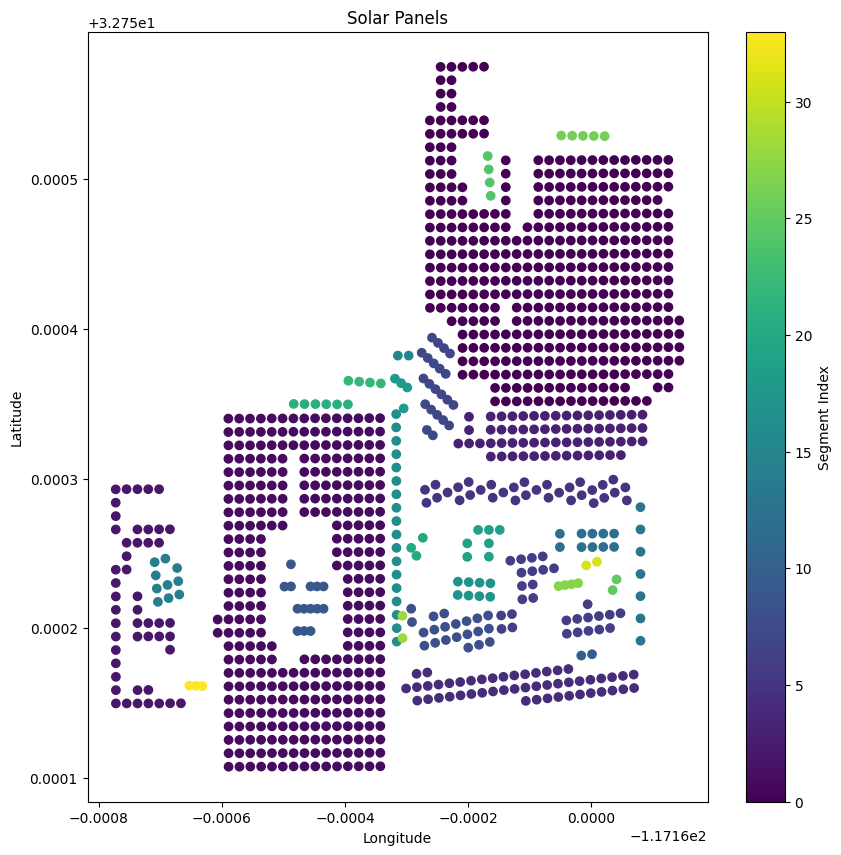

In [4]:
import matplotlib.pyplot as plt

# Initialize an empty list to store the solar panels data
solar_panels_data = []

# Extract 'solarPanels' list from the main 'data' dictionary
solar_panels_list = solarPotential_data.get('solarPanels', [])

# Loop through the list to construct solar_panels_data
for sample in solar_panels_list:
    sample_dict = {
        'center': sample.get('center', {}),
        'orientation': sample.get('orientation', ''),
        'yearlyEnergyDcKwh': sample.get('yearlyEnergyDcKwh', 0.0),
        'segmentIndex': sample.get('segmentIndex', 0)
    }
    solar_panels_data.append(sample_dict)

# Output the number of items in the list for verification
print(f"Number of items in 'solarPanels': {len(solar_panels_data)}")
# Prepare the coordinates for plotting
latitudes = [sample['center']['latitude'] for sample in solar_panels_data]
longitudes = [sample['center']['longitude'] for sample in solar_panels_data]
colors = [sample['segmentIndex'] for sample in solar_panels_data]

# Create the plot
plt.figure(figsize=(10, 10))
sc = plt.scatter(longitudes, latitudes, c=colors, cmap='viridis')

# Add color bar to indicate segmentIndex
plt.colorbar(sc, label='Segment Index')

# Labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Solar Panels')

# Show the plot
plt.show()


In [12]:
# Extract 'wholeRoofStats' from the 'solarPotential_data'
whole_roof_stats = solarPotential_data.get('wholeRoofStats', {})


# If you also want to see the values, you can do so as follows:
for key, value in whole_roof_stats.items():
    print(f"Key: {key}, Value: {value}")



Key: areaMeters2, Value: 172.86774
Key: sunshineQuantiles, Value: [514, 1013, 1204, 1228, 1238, 1247, 1260, 1278, 1316, 1443, 1523]
Key: groundAreaMeters2, Value: 149.85


In [13]:


# Access the 'solarPanelConfigs' list
solar_panel_configs = solarPotential_data.get('solarPanelConfigs', [])

# Loop through each configuration and print it
for i, config in enumerate(solar_panel_configs):
    print(f"Panel Config {i+1}: {config}")


Panel Config 1: {'panelsCount': 4, 'yearlyEnergyDcKwh': 1506.9874, 'roofSegmentSummaries': [{'pitchDegrees': 32.35102, 'azimuthDegrees': 177.24368, 'panelsCount': 4, 'yearlyEnergyDcKwh': 1506.9873, 'segmentIndex': 3}]}
Panel Config 2: {'panelsCount': 5, 'yearlyEnergyDcKwh': 1876.3165, 'roofSegmentSummaries': [{'pitchDegrees': 32.35102, 'azimuthDegrees': 177.24368, 'panelsCount': 5, 'yearlyEnergyDcKwh': 1876.3164, 'segmentIndex': 3}]}
Panel Config 3: {'panelsCount': 6, 'yearlyEnergyDcKwh': 2237.153, 'roofSegmentSummaries': [{'pitchDegrees': 32.35102, 'azimuthDegrees': 177.24368, 'panelsCount': 6, 'yearlyEnergyDcKwh': 2237.1528, 'segmentIndex': 3}]}
Panel Config 4: {'panelsCount': 7, 'yearlyEnergyDcKwh': 2594.527, 'roofSegmentSummaries': [{'pitchDegrees': 32.35102, 'azimuthDegrees': 177.24368, 'panelsCount': 7, 'yearlyEnergyDcKwh': 2594.5269, 'segmentIndex': 3}]}
Panel Config 5: {'panelsCount': 8, 'yearlyEnergyDcKwh': 2942.5896, 'roofSegmentSummaries': [{'pitchDegrees': 32.35102, 'azimut

In [114]:
# Code to explore all entries under 'financialAnalyses'
def explore_financialAnalyses(financialAnalyses_list):
    # Initialize an empty list to store the structures of each entry
    all_structures = []
    
    # Loop through each entry in 'financialAnalyses'
    for i, entry in enumerate(financialAnalyses_list):
        # Extract the structure of the current entry
        current_structure = {key: type(value).__name__ for key, value in entry.items()}
        
        # Append the current structure to the list of all structures
        all_structures.append(current_structure)
    
    return all_structures

# Extract the 'financialAnalyses' list from the 'solarPotential' data
financialAnalyses_list = solarPotential_data['financialAnalyses']

# Get the structures of all entries under 'financialAnalyses'
all_financialAnalyses_structures = explore_financialAnalyses(financialAnalyses_list)
all_financialAnalyses_structures[:5]  # Displaying the first 5 entries for illustration


[{'monthlyBill': 'dict', 'panelConfigIndex': 'int'},
 {'monthlyBill': 'dict', 'panelConfigIndex': 'int'},
 {'monthlyBill': 'dict', 'panelConfigIndex': 'int'},
 {'monthlyBill': 'dict',
  'panelConfigIndex': 'int',
  'financialDetails': 'dict',
  'leasingSavings': 'dict',
  'cashPurchaseSavings': 'dict',
  'financedPurchaseSavings': 'dict'},
 {'monthlyBill': 'dict',
  'panelConfigIndex': 'int',
  'financialDetails': 'dict',
  'leasingSavings': 'dict',
  'cashPurchaseSavings': 'dict',
  'financedPurchaseSavings': 'dict'}]

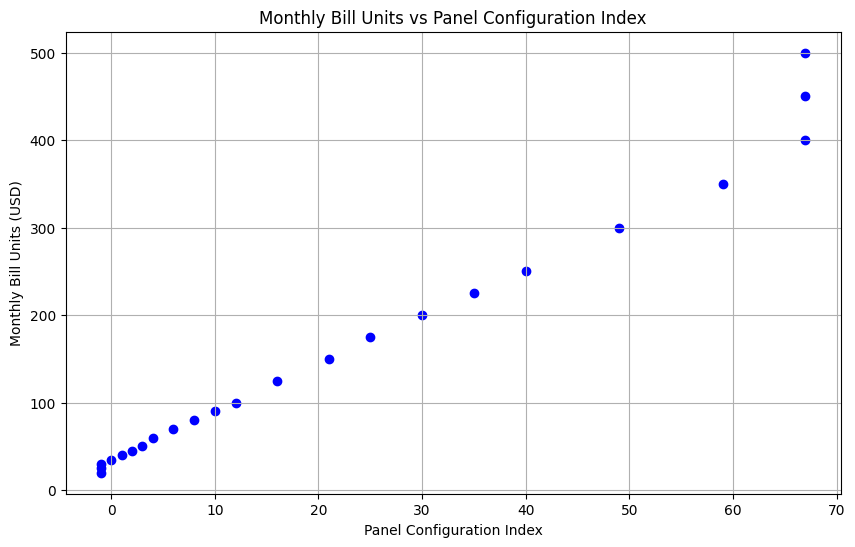

In [15]:
import matplotlib.pyplot as plt
import pandas as pd

financialAnalyses_data = solarPotential_data['financialAnalyses']
# Convert the list of financial analyses to a DataFrame
financial_df = pd.DataFrame(financialAnalyses_data)

# Importing necessary libraries for plotting
import matplotlib.pyplot as plt

# Extracting the 'units' from 'monthlyBill' and 'panelConfigIndex' for all entries
monthlyBill_units = [float(item['monthlyBill']['units']) for item in financialAnalyses_data]
panelConfigIndex_values = [item['panelConfigIndex'] for item in financialAnalyses_data]

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.scatter(panelConfigIndex_values, monthlyBill_units, marker='o', color='b')
plt.title('Monthly Bill Units vs Panel Configuration Index')
plt.xlabel('Panel Configuration Index')
plt.ylabel('Monthly Bill Units (USD)')
plt.grid(True)
plt.show()

In [113]:
# Accessing the 'roofSegmentStats' from the 'solarPotential_data' dictionary
roofSegmentStats_data = solarPotential_data.get('roofSegmentStats', None)

# Printing the structure and a few samples for illustration
if roofSegmentStats_data is not None:
    print(f"Type: {type(roofSegmentStats_data)}")
    print(f"List Length: {len(roofSegmentStats_data)}")
    print("Sample Data:")
    for i, sample in enumerate(roofSegmentStats_data):  # Showing first 3 samples
        print(f"Sample {i+1}: {sample}")
else:
    print("Key 'roofSegmentStats' not found.")

Type: <class 'list'>
List Length: 6
Sample Data:
Sample 1: {'pitchDegrees': 30.733656, 'azimuthDegrees': 266.58456, 'stats': {'areaMeters2': 80.44886, 'sunshineQuantiles': [544, 894, 1200, 1221, 1229, 1235, 1241, 1246, 1252, 1278, 1521], 'groundAreaMeters2': 69.15}, 'center': {'latitude': 42.2542113, 'longitude': -70.9628027}, 'boundingBox': {'sw': {'latitude': 42.2541204, 'longitude': -70.96283369999999}, 'ne': {'latitude': 42.2542924, 'longitude': -70.9627678}}, 'planeHeightAtCenterMeters': 9.990049}
Sample 2: {'pitchDegrees': 30.035275, 'azimuthDegrees': 85.3547, 'stats': {'areaMeters2': 21.866259, 'sunshineQuantiles': [684, 1051, 1199, 1233, 1249, 1259, 1267, 1273, 1283, 1297, 1424], 'groundAreaMeters2': 18.93}, 'center': {'latitude': 42.2542633, 'longitude': -70.9627656}, 'boundingBox': {'sw': {'latitude': 42.2542265, 'longitude': -70.9627853}, 'ne': {'latitude': 42.254294699999996, 'longitude': -70.96274319999999}}, 'planeHeightAtCenterMeters': 10.234403}
Sample 3: {'pitchDegrees

/tmp/ipykernel_3762/1710955717.py:40: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter([sw[1], ne[1]], [sw[0], ne[0]], c=color, zorder=5)


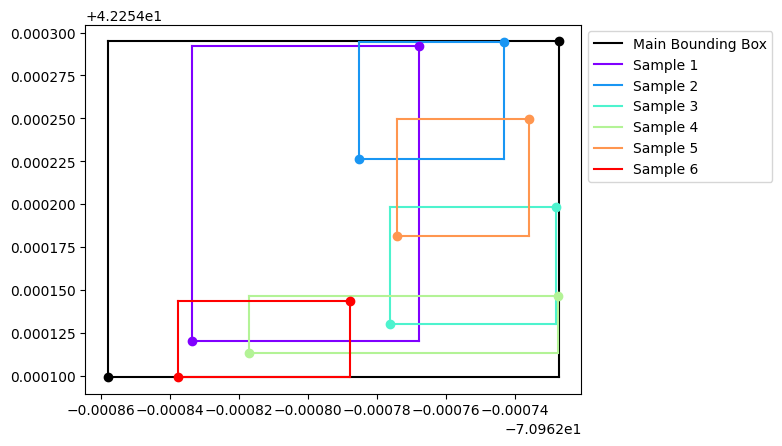

In [124]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np



# Extract 'roofSegmentStats' list from 'solarPotential' dictionary
roofSegmentStats = data['solarPotential']['roofSegmentStats']

# Create a color map
n_samples = len(roofSegmentStats)
colors = cm.rainbow(np.linspace(0, 1, n_samples))

# Extract main bounding box coordinates
main_bounding_box = data['boundingBox']
main_sw = (main_bounding_box['sw']['latitude'], main_bounding_box['sw']['longitude'])
main_ne = (main_bounding_box['ne']['latitude'], main_bounding_box['ne']['longitude'])

# Plot main bounding box
plt.plot([main_sw[1], main_ne[1]], [main_sw[0], main_sw[0]], 'k-', label='Main Bounding Box')
plt.plot([main_sw[1], main_ne[1]], [main_ne[0], main_ne[0]], 'k-')
plt.plot([main_sw[1], main_sw[1]], [main_sw[0], main_ne[0]], 'k-')
plt.plot([main_ne[1], main_ne[1]], [main_sw[0], main_ne[0]], 'k-')

# Highlight main SW and NE points
plt.scatter([main_sw[1], main_ne[1]], [main_sw[0], main_ne[0]], c='k', zorder=5)

# Plot sample bounding boxes
for i, segment in enumerate(roofSegmentStats):
    sw = (segment['boundingBox']['sw']['latitude'], segment['boundingBox']['sw']['longitude'])
    ne = (segment['boundingBox']['ne']['latitude'], segment['boundingBox']['ne']['longitude'])
    color = colors[i]
    
    plt.plot([sw[1], ne[1]], [sw[0], sw[0]], color=color)
    plt.plot([sw[1], ne[1]], [ne[0], ne[0]], color=color)
    plt.plot([sw[1], sw[1]], [sw[0], ne[0]], color=color, label=f'Sample {i+1}')
    plt.plot([ne[1], ne[1]], [sw[0], ne[0]], color=color)

    # Highlight SW and NE points
    plt.scatter([sw[1], ne[1]], [sw[0], ne[0]], c=color, zorder=5)

# Add legend
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show plot
plt.show()


In [264]:


# Extract heights of each sample and store in a list
sample_heights = []
for i, segment in enumerate(roofSegmentStats):
    height = segment.get('planeHeightAtCenterMeters', None)
    if height is not None:
        sample_heights.append(height)
        print(f"Height of Sample {i+1}: {height} meters")

Height of Sample 1: 9.990049 meters
Height of Sample 2: 10.234403 meters
Height of Sample 3: 10.224159 meters
Height of Sample 4: 9.479269 meters
Height of Sample 5: 10.453384 meters
Height of Sample 6: 3.233157 meters


In [110]:
from shapely.geometry import Polygon
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def draw_box(ax, box, label, edgecolor, facecolor='none'):
    xmin, ymin, xmax, ymax = box
    ax.add_patch(
        patches.Rectangle(
            (xmin, ymin), xmax - xmin, ymax - ymin,
            linewidth=1, edgecolor=edgecolor, facecolor=facecolor, label=label
        )
    )
    ax.scatter([xmin, xmax], [ymin, ymax], c=edgecolor, zorder=5)

# Extract main bounding box
main_box_data = data['boundingBox']
main_box = [main_box_data['sw']['latitude'], main_box_data['sw']['longitude'], 
            main_box_data['ne']['latitude'], main_box_data['ne']['longitude']]

# Extract sample boxes
sample_boxes_data = data['solarPotential']['roofSegmentStats']
sample_boxes = []
for sample in sample_boxes_data:
    box = sample['boundingBox']
    sample_boxes.append([box['sw']['latitude'], box['sw']['longitude'], 
                         box['ne']['latitude'], box['ne']['longitude']])

# Create shapely polygons for sample boxes
polygons = [Polygon([(box[0], box[1]), (box[0], box[3]), (box[2], box[3]), (box[2], box[1])]) for box in sample_boxes]

# Initialize plot
fig, ax = plt.subplots()

# Draw main bounding box
draw_box(ax, main_box, 'Main Box', 'black')

# Draw sample bounding boxes and find intersections
colors = ['red', 'green', 'blue', 'purple']
for i, (box, poly1) in enumerate(zip(sample_boxes, polygons)):
    draw_box(ax, box, f'Sample {i+1}', colors[i % len(colors)])
    
    # Find intersection with other sample boxes and add to plot
    for j, poly2 in enumerate(polygons[i+1:], start=i+1):
        intersection = poly1.intersection(poly2)
        
        if intersection.is_empty:
            continue

        if intersection.geom_type == 'Polygon':
            x, y = intersection.exterior.xy
            ax.fill(x, y, alpha=0.5, label=f'Overlap {i+1}-{j+1}')
        elif intersection.geom_type in ['LineString', 'Point']:
            print(f"Sample {i+1} and Sample {j+1} are touching but not overlapping.")

# Annotations and Grid
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.title('Bounding Boxes with Overlaps')
plt.show()


KeyError: 'boundingBox'

In [125]:
import math

# Function to calculate distance between two latitude-longitude points
def calculate_distance(coord1, coord2):
    R = 6371000  # Radius of Earth in meters
    lat1, lon1 = math.radians(coord1[0]), math.radians(coord1[1])
    lat2, lon2 = math.radians(coord2[0]), math.radians(coord2[1])
    
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    
    a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    
    return R * c

# Extract sample boxes
sample_boxes_data = data['solarPotential']['roofSegmentStats']

# Calculate and compare areas
for i, sample in enumerate(sample_boxes_data):
    box = sample['boundingBox']
    sw = (box['sw']['latitude'], box['sw']['longitude'])
    ne = (box['ne']['latitude'], box['ne']['longitude'])
    
    # Calculate area of bounding box in meters^2
    width = calculate_distance((sw[0], sw[1]), (ne[0], sw[1]))
    height = calculate_distance((sw[0], sw[1]), (sw[0], ne[1]))
    bounding_box_area = width * height
    
    # Extract areaMeters2 and groundAreaMeters2 from JSON
    area_meters2 = sample['stats']['areaMeters2']
    ground_area_meters2 = sample['stats']['groundAreaMeters2']
    
    print(f"Sample {i+1}")
    print(f"Calculated Bounding Box Area: {bounding_box_area} m^2")
    print(f"areaMeters2 from JSON: {area_meters2} m^2")
    print(f"groundAreaMeters2 from JSON: {ground_area_meters2} m^2")
    print("---")

Sample 1
Calculated Bounding Box Area: 103.73257340321358 m^2
areaMeters2 from JSON: 80.44886 m^2
groundAreaMeters2 from JSON: 69.15 m^2
---
Sample 2
Calculated Bounding Box Area: 26.276470546530206 m^2
areaMeters2 from JSON: 21.866259 m^2
groundAreaMeters2 from JSON: 18.93 m^2
---
Sample 3
Calculated Bounding Box Area: 30.1279071570338 m^2
areaMeters2 from JSON: 20.933252 m^2
groundAreaMeters2 from JSON: 18.17 m^2
---
Sample 4
Calculated Bounding Box Area: 26.99931821069944 m^2
areaMeters2 from JSON: 19.9814 m^2
groundAreaMeters2 from JSON: 16.88 m^2
---
Sample 5
Calculated Bounding Box Area: 23.932011603403737 m^2
areaMeters2 from JSON: 18.28056 m^2
groundAreaMeters2 from JSON: 15.64 m^2
---
Sample 6
Calculated Bounding Box Area: 20.098764741518128 m^2
areaMeters2 from JSON: 11.357405 m^2
groundAreaMeters2 from JSON: 11.08 m^2
---


In [105]:
def greedy_panel_fitting(samples):
    """Calculate the maximum number of panels that can fit in each sample using a Greedy Method."""
    
    panel_count_per_sample = {}  # Dictionary to hold the number of panels that can fit in each sample
    panel_width = 65  # Width of the panel in inches
    panel_height = 39  # Height of the panel in inches

    # Loop through each sample to calculate the number of panels that can fit
    for i, sample in enumerate(samples):
        # Extract the coordinates for the South-West and North-East corners of the bounding box
        sw_lat, sw_lon = sample['boundingBox']['sw']['latitude'], sample['boundingBox']['sw']['longitude']
        ne_lat, ne_lon = sample['boundingBox']['ne']['latitude'], sample['boundingBox']['ne']['longitude']

        # Convert latitude and longitude to a Cartesian coordinate system
        # For simplicity, assume 1 degree latitude or longitude is approximately 69 miles,
        # and 1 mile is 63360 inches
        width = abs(ne_lon - sw_lon) * 69 * 63360  # Width of the bounding box in inches
        height = abs(ne_lat - sw_lat) * 69 * 63360  # Height of the bounding box in inches

        # Calculate how many panels can fit along the width and height of the bounding box
        panels_in_width = int(width // panel_width)
        panels_in_height = int(height // panel_height)

        # Calculate the total number of panels that can fit in this bounding box
        total_panels = panels_in_width * panels_in_height

        # Store the result in the dictionary
        panel_count_per_sample[f"Sample_{i+1}"] = total_panels

    return panel_count_per_sample

# Extract 'roofSegmentStats' from the 'solarPotential_data'
roof_segment_stats = solarPotential_data.get('roofSegmentStats', [])

# Initialize an empty list to hold the samples
samples = []

# Loop through each segment to extract the bounding box information
for segment in roof_segment_stats:
    bounding_box = segment.get('boundingBox', {})
    sample = {'boundingBox': bounding_box}
    samples.append(sample)


# Run the Greedy Method to find the number of panels that can fit in each sample
result = greedy_panel_fitting(samples)
print("Total number of panels that can fit in each sample:", result)

Total number of panels that can fit in each sample: {'Sample_1': 76, 'Sample_2': 14, 'Sample_3': 21, 'Sample_4': 18, 'Sample_5': 14, 'Sample_6': 12}


In [106]:
from math import radians, sin, cos, sqrt, atan2

def haversine_distance(lat1, lon1, lat2, lon2):
    """Calculate the Haversine distance between two points on the earth in inches."""
    R = 3958.8  # Radius of Earth in miles
    dlat = radians(lat2 - lat1)
    dlon = radians(lon2 - lon1)
    a = sin(dlat/2) * sin(dlat/2) + cos(radians(lat1)) * cos(radians(lat2)) * sin(dlon/2) * sin(dlon/2)
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    distance = R * c  # Distance in miles
    return distance * 63360  # Convert to inches

def greedy_panel_fitting(samples):
    panel_count_per_sample = {}
    panel_width = 65  # in inches
    panel_height = 39  # in inches

    for i, sample in enumerate(samples):
        sw_lat, sw_lon = sample['boundingBox']['sw']['latitude'], sample['boundingBox']['sw']['longitude']
        ne_lat, ne_lon = sample['boundingBox']['ne']['latitude'], sample['boundingBox']['ne']['longitude']

        # Calculate the width and height of the bounding box in inches using Haversine formula
        width = haversine_distance(sw_lat, sw_lon, sw_lat, ne_lon)
        height = haversine_distance(sw_lat, sw_lon, ne_lat, sw_lon)

        panels_in_width = int(width // panel_width)
        panels_in_height = int(height // panel_height)
        total_panels = panels_in_width * panels_in_height

        panel_count_per_sample[f"Sample_{i+1}"] = total_panels

    return panel_count_per_sample

# Your data extraction code here, such as:
# roof_segment_stats = solarPotential_data.get('roofSegmentStats', [])
# samples = [{'boundingBox': bounding_box} for segment in roof_segment_stats]

result = greedy_panel_fitting(samples)
print("Total number of panels that can fit in each sample:", result)

Total number of panels that can fit in each sample: {'Sample_1': 57, 'Sample_2': 14, 'Sample_3': 14, 'Sample_4': 12, 'Sample_5': 7, 'Sample_6': 8}


In [107]:
from math import radians, sin, cos, sqrt, atan2

def haversine_distance(lat1, lon1, lat2, lon2):
    R = 3958.8  # Radius of Earth in miles
    dlat = radians(lat2 - lat1)
    dlon = radians(lon2 - lon1)
    a = sin(dlat/2)**2 + cos(radians(lat1)) * cos(radians(lat2)) * sin(dlon/2)**2
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    distance = R * c  # Distance in miles
    return distance * 63360  # Convert to inches

def greedy_panel_fitting(samples):
    panel_count_per_sample = {}
    panel_width = 65  # in inches
    panel_height = 39  # in inches

    for i, sample in enumerate(samples):
        sw_lat, sw_lon = sample['boundingBox']['sw']['latitude'], sample['boundingBox']['sw']['longitude']
        ne_lat, ne_lon = sample['boundingBox']['ne']['latitude'], sample['boundingBox']['ne']['longitude']

        width = haversine_distance(sw_lat, sw_lon, sw_lat, ne_lon)
        height = haversine_distance(sw_lat, sw_lon, ne_lat, sw_lon)
        
        # Calculate the number of panels for both orientations
        panels_in_width = round(width / panel_width)
        panels_in_height = round(height / panel_height)
        total_panels = panels_in_width * panels_in_height

        panel_count_per_sample[f"Sample_{i+1}"] = total_panels

    return panel_count_per_sample

# Your data extraction code here, such as:
# roof_segment_stats = solarPotential_data.get('roofSegmentStats', [])
# samples = [{'boundingBox': bounding_box} for segment in roof_segment_stats]

# Calculate panel fitting results
result = greedy_panel_fitting(samples)
print("Total number of panels that can fit in each sample:", result)


Total number of panels that can fit in each sample: {'Sample_1': 57, 'Sample_2': 16, 'Sample_3': 16, 'Sample_4': 16, 'Sample_5': 16, 'Sample_6': 10}


In [126]:
from math import radians, sin, cos, sqrt, atan2

# Function to calculate the Haversine distance between two points on the Earth's surface
def haversine_distance(lat1, lon1, lat2, lon2):
    R = 3958.8  # Radius of Earth in miles
    dlat = radians(lat2 - lat1)
    dlon = radians(lon2 - lon1)
    a = sin(dlat/2) * sin(dlat/2) + cos(radians(lat1)) * cos(radians(lat2)) * sin(dlon/2) * sin(dlon/2)
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    distance = R * c  # Distance in miles
    return distance * 63360  # Convert to inches

# Function to calculate the number of panels that can fit inside a bounding box
def panels_in_bounding_box(bounding_box, panel_width, panel_height):
    sw_lat, sw_lon, ne_lat, ne_lon = bounding_box

    # Calculate the width and height of the bounding box in inches using Haversine formula
    width = haversine_distance(sw_lat, sw_lon, sw_lat, ne_lon)
    height = haversine_distance(sw_lat, sw_lon, ne_lat, sw_lon)

    # Calculate the number of panels that can fit
    panels_in_width = int(width // panel_width)
    panels_in_height = int(height // panel_height)
    total_panels = panels_in_width * panels_in_height

    return total_panels

# Extract main bounding box
main_box_data = data['boundingBox']
main_box = [
    main_box_data['sw']['latitude'],
    main_box_data['sw']['longitude'],
    main_box_data['ne']['latitude'],
    main_box_data['ne']['longitude']
]

# Dimensions of a single solar panel in inches
panel_width = 65
panel_height = 39

# Calculate the number of panels that can fit inside the main bounding box
total_panels_in_main_box = panels_in_bounding_box(main_box, panel_width, panel_height)

# Print the result
print("Total number of panels that can fit inside the main bounding box:", total_panels_in_main_box)



Total number of panels that can fit inside the main bounding box: 126


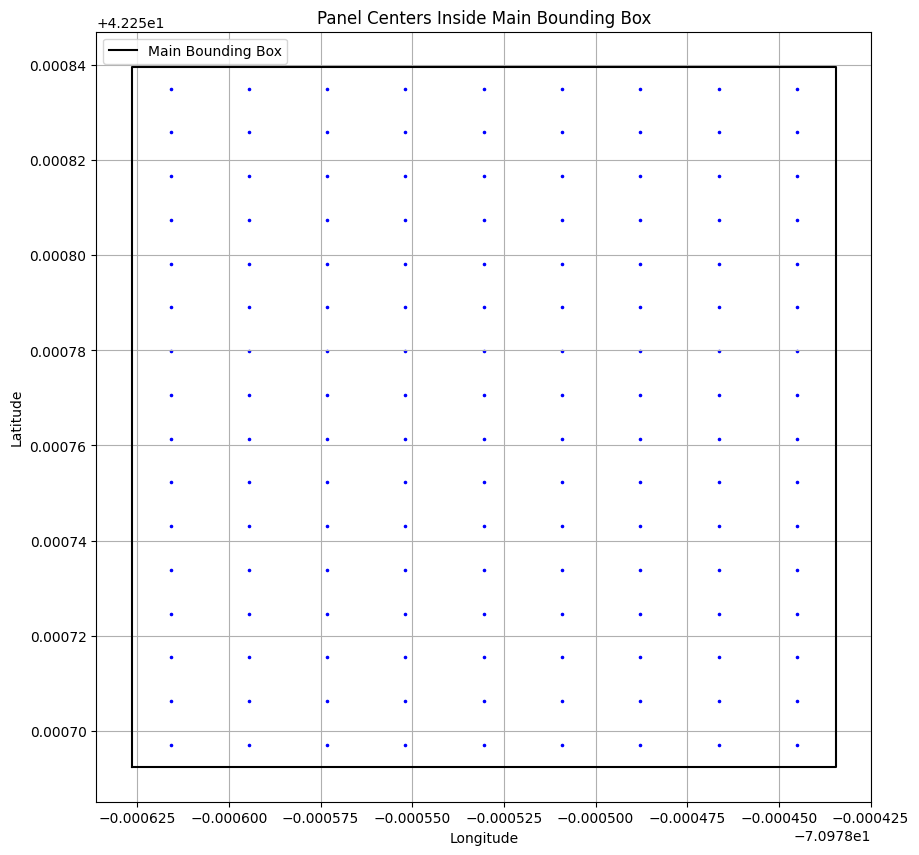

In [278]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Function to calculate the Haversine distance between two points on the Earth's surface
def haversine_distance(lat1, lon1, lat2, lon2):
    R = 3958.8  # Radius of Earth in miles
    dlat = radians(lat2 - lat1)
    dlon = radians(lon2 - lon1)
    a = sin(dlat/2) * sin(dlat/2) + cos(radians(lat1)) * cos(radians(lat2)) * sin(dlon/2) * sin(dlon/2)
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    distance = R * c  # Distance in miles
    return distance * 63360  # Convert to inches

# Function to calculate the number of panels that can fit inside a bounding box
def panels_in_bounding_box(bounding_box, panel_width, panel_height):
    sw_lat, sw_lon, ne_lat, ne_lon = bounding_box

    # Calculate the width and height of the bounding box in inches using Haversine formula
    width = haversine_distance(sw_lat, sw_lon, sw_lat, ne_lon)
    height = haversine_distance(sw_lat, sw_lon, ne_lat, sw_lon)

    # Calculate the number of panels that can fit
    panels_in_width = int(width // panel_width)
    panels_in_height = int(height // panel_height)
    total_panels = panels_in_width * panels_in_height

    return total_panels

# Function to calculate the panel centers
def calculate_panel_centers(bounding_box, panel_width, panel_height):
    sw_lat, sw_lon, ne_lat, ne_lon = bounding_box

    # Calculate the number of panels in width and height
    panels_in_width = int(haversine_distance(sw_lat, sw_lon, sw_lat, ne_lon) // panel_width)
    panels_in_height = int(haversine_distance(sw_lat, sw_lon, ne_lat, sw_lon) // panel_height)

    # Calculate the step size for panel centers
    lat_step = (ne_lat - sw_lat) / panels_in_height
    lon_step = (ne_lon - sw_lon) / panels_in_width

    # Calculate and store panel centers
    panel_centers = []
    for i in range(panels_in_height):
        for j in range(panels_in_width):
            center_lat = sw_lat + i * lat_step + lat_step / 2
            center_lon = sw_lon + j * lon_step + lon_step / 2
            panel_centers.append((center_lat, center_lon))

    return panel_centers

# Extract main bounding box
main_box_data = data['boundingBox']
main_box = [
    main_box_data['sw']['latitude'],
    main_box_data['sw']['longitude'],
    main_box_data['ne']['latitude'],
    main_box_data['ne']['longitude']
]

# Dimensions of a single solar panel in inches
panel_width = 65
panel_height = 39

# Calculate the number of panels that can fit inside the main bounding box
total_panels_in_main_box = panels_in_bounding_box(main_box, panel_width, panel_height)

# Calculate panel centers
panel_centers = calculate_panel_centers(main_box, panel_width, panel_height)

# Plotting code
plt.figure(figsize=(10, 10))
plt.plot([main_box[1], main_box[3], main_box[3], main_box[1], main_box[1]], 
         [main_box[0], main_box[0], main_box[2], main_box[2], main_box[0]], 'k-', label='Main Bounding Box')

# Plot panel centers
for center in panel_centers:
    plt.scatter(center[1], center[0], c='b', marker='.', s=10)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Panel Centers Inside Main Bounding Box')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


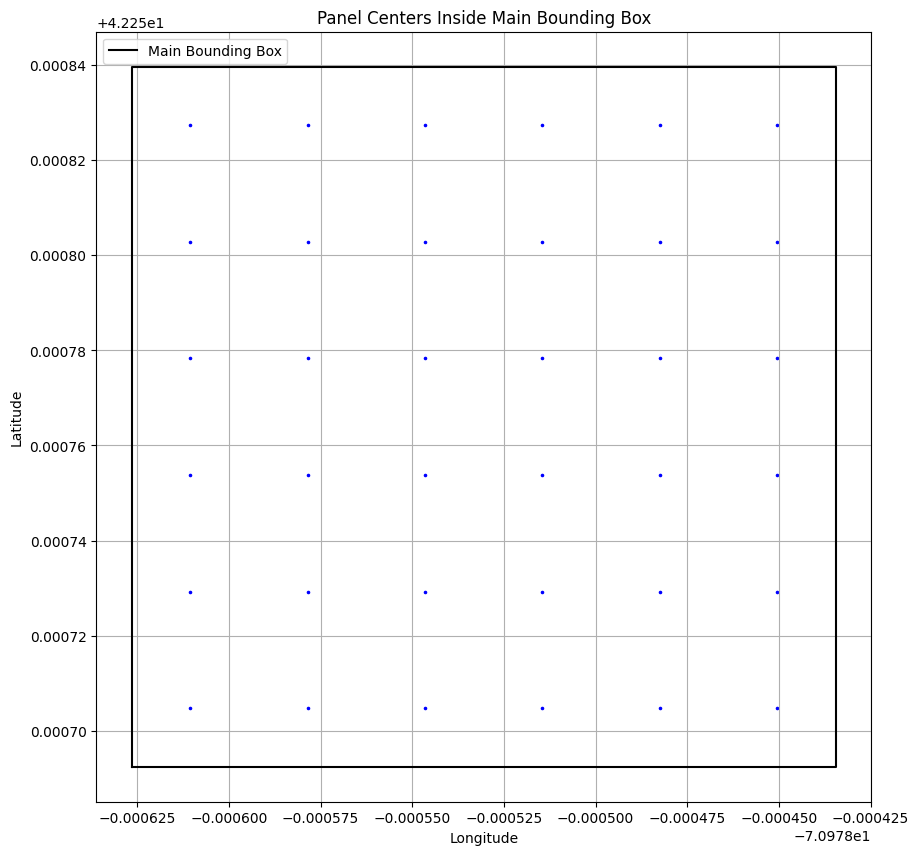

Total number of panels that can fit inside the main bounding box: 36


In [326]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Function to calculate the Haversine distance between two points on the Earth's surface
def haversine_distance(lat1, lon1, lat2, lon2):
    R = 3958.8  # Radius of Earth in miles
    dlat = radians(lat2 - lat1)
    dlon = radians(lon2 - lon1)
    a = sin(dlat/2) * sin(dlat/2) + cos(radians(lat1)) * cos(radians(lat2)) * sin(dlon/2) * sin(dlon/2)
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    distance = R * c  # Distance in miles
    return distance * 63360  # Convert to inches

# Function to calculate the number of panels that can fit inside a bounding box
def panels_in_bounding_box(bounding_box, panel_width, panel_height):
    sw_lat, sw_lon, ne_lat, ne_lon = bounding_box

    # Calculate the width and height of the bounding box in inches using Haversine formula
    width = haversine_distance(sw_lat, sw_lon, sw_lat, ne_lon)
    height = haversine_distance(sw_lat, sw_lon, ne_lat, sw_lon)

    # Calculate the number of panels that can fit
    panels_in_width = int(width // panel_width)
    panels_in_height = int(height // panel_height)
    total_panels = panels_in_width * panels_in_height

    return total_panels

# Function to calculate the panel centers
def calculate_panel_centers(bounding_box, panel_width, panel_height):
    sw_lat, sw_lon, ne_lat, ne_lon = bounding_box

    # Calculate the number of panels in width and height
    panels_in_width = int(haversine_distance(sw_lat, sw_lon, sw_lat, ne_lon) // panel_width)
    panels_in_height = int(haversine_distance(sw_lat, sw_lon, ne_lat, sw_lon) // panel_height)

    # Calculate the step size for panel centers
    lat_step = (ne_lat - sw_lat) / panels_in_height
    lon_step = (ne_lon - sw_lon) / panels_in_width

    # Calculate and store panel centers along with their latitudes and longitudes
    panel_centers = []
    for i in range(panels_in_height):
        for j in range(panels_in_width):
            center_lat = sw_lat + i * lat_step + lat_step / 2
            center_lon = sw_lon + j * lon_step + lon_step / 2
            panel_centers.append((center_lat, center_lon))
            #print(f"Panel Center {len(panel_centers)} - Latitude: {center_lat}, Longitude: {center_lon}")

    return panel_centers

# Extract main bounding box
main_box_data = data['boundingBox']
main_box = [
    main_box_data['sw']['latitude'],
    main_box_data['sw']['longitude'],
    main_box_data['ne']['latitude'],
    main_box_data['ne']['longitude']
]


# Calculate the number of panels that can fit inside the main bounding box
total_panels_in_main_box = panels_in_bounding_box(main_box, panel_width, panel_height)

# Calculate panel centers and print their latitudes and longitudes
panel_centers = calculate_panel_centers(main_box, panel_width, panel_height)

# Plotting code
plt.figure(figsize=(10, 10))
plt.plot([main_box[1], main_box[3], main_box[3], main_box[1], main_box[1]], 
         [main_box[0], main_box[0], main_box[2], main_box[2], main_box[0]], 'k-', label='Main Bounding Box')

# Plot panel centers
for center in panel_centers:
    plt.scatter(center[1], center[0], c='b', marker='.', s=10)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Panel Centers Inside Main Bounding Box')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()
# Print the result
print("Total number of panels that can fit inside the main bounding box:", total_panels_in_main_box)


In [313]:
from math import radians, sin, cos, sqrt, atan2

# Function to calculate the Haversine distance between two points on the Earth's surface
def haversine_distance(lat1, lon1, lat2, lon2):
    R = 3958.8  # Radius of Earth in miles
    dlat = radians(lat2 - lat1)
    dlon = radians(lon2 - lon1)
    a = sin(dlat/2) * sin(dlat/2) + cos(radians(lat1)) * cos(radians(lat2)) * sin(dlon/2) * sin(dlon/2)
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    distance = R * c  # Distance in miles
    return distance * 63360  # Convert to inches

# Function to calculate distances between neighboring panel centers
def calculate_distances(panel_centers):
    num_centers = len(panel_centers)
    min_distances = {}

    for i in range(num_centers):
        for j in range(i + 1, num_centers):
            lat1, lon1 = panel_centers[i]
            lat2, lon2 = panel_centers[j]
            distance = haversine_distance(lat1, lon1, lat2, lon2)
            min_distances[(i, j)] = distance

    return min_distances


# Calculate minimum distances between neighboring panel centers in inches
distances = calculate_distances(panel_centers)

# Find the minimum distance
min_distance = min(distances.values())

# Print the minimum distance in inches
print(f"Minimum distance between neighboring panels: {min_distance} inches")


Minimum distance between neighboring panels: 102.04258066106527 inches


In [327]:
 # Extract 'roofSegmentStats' from the 'solarPotential_data'
roof_segment_stats = solarPotential_data.get('roofSegmentStats', [])

# Initialize an empty list to hold the samples
samples = []

# Initialize a dictionary to store the bounding boxes for each sample
sample_bounding_boxes = {}

# Loop through each sample and extract the bounding box information
for i, segment in enumerate(roof_segment_stats):
    bounding_box = segment.get('boundingBox', {})
    sw_lat = bounding_box.get('sw', {}).get('latitude', None)
    sw_lon = bounding_box.get('sw', {}).get('longitude', None)
    ne_lat = bounding_box.get('ne', {}).get('latitude', None)
    ne_lon = bounding_box.get('ne', {}).get('longitude', None)

    if sw_lat is not None and sw_lon is not None and ne_lat is not None and ne_lon is not None:
        sample_name = f'Sample_{i+1}'
        sample_bounding_boxes[sample_name] = (sw_lat, sw_lon, ne_lat, ne_lon)
        #print(f"Sample {i+1} - SW: ({sw_lat}, {sw_lon}), NE: ({ne_lat}, {ne_lon})")

Sample 1 - SW: (42.2507291, -70.9785879), NE: (42.2508397, -70.9784355)
Sample 2 - SW: (42.2507266, -70.9785713), NE: (42.2508121, -70.97846930000001)
Sample 3 - SW: (42.2507527, -70.9786257), NE: (42.250807599999995, -70.97856949999999)
Sample 4 - SW: (42.2506938, -70.9785444), NE: (42.250728300000006, -70.9784707)
Sample 5 - SW: (42.2507127, -70.97859369999999), NE: (42.250754099999995, -70.978544)


{'sw': {'latitude': 42.254099499999995, 'longitude': -70.9628376},
 'ne': {'latitude': 42.2541436, 'longitude': -70.9627878}}

In [328]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd

# Declare panel_df as global
global panel_df

def assign_panel_numbers_and_colors(panel_centers, sample_bounding_boxes, sample_heights):
    global panel_df  # Indicate that we are using the global variable
    panel_info = []
    panel_numbers = {}
    panel_colors = {}
    
    for i, panel_center in enumerate(panel_centers):
        #print(f"Checking panel at {panel_center}")
        lat, lon = panel_center
        assigned_sample = None
        highest_sample_height = -1

        for j, (sample_name, bounding_box) in enumerate(sample_bounding_boxes.items()):
            #=print(f"Panel at {lat}, {lon} is being checked against {sample_name}")
            sw_lat, sw_lon, ne_lat, ne_lon = bounding_box
            #print(f"sw_lat: {sw_lat}, sw_lon: {sw_lon}, ne_lat: {ne_lat}, ne_lon: {ne_lon}, lat: {lat}, lon: {lon}")
            if sw_lat <= lat <= ne_lat and sw_lon <= lon <= ne_lon:
                print(f"Panel at {lat}, {lon} is within bounding box {bounding_box}")
                if sample_heights[j] > highest_sample_height:
                    print(f"Panel at {lat}, {lon} is assigned to {sample_name}")
                    assigned_sample = sample_name
                    if sample_heights[j] > highest_sample_height:
                        print(f"the highest changed from {highest_sample_height} to {sample_heights[j]}")
                    highest_sample_height = sample_heights[j]

        if assigned_sample:
            #print( f"Panel at {lat}, {lon} is assigned to {assigned_sample}")
            panel_number = len(panel_numbers) + 1
            panel_numbers[panel_center] = panel_number
            panel_colors[panel_center] = cm.tab20(i)
            panel_info.append([panel_number, assigned_sample, panel_center, highest_sample_height])
            
    panel_df = pd.DataFrame(panel_info, columns=['Panel Number', 'Sample Assigned', 'Panel Center', 'Panel Height'])
    
    # Filter out unassigned panels
    panel_df = panel_df[panel_df['Sample Assigned'].notna()]
    
    return panel_numbers, panel_colors

# Call the function
panel_numbers, panel_colors = assign_panel_numbers_and_colors(panel_centers, sample_bounding_boxes, sample_heights)

# Access the global DataFrame for later use
print(panel_df)


Panel at 42.250704675, -70.97851448333334 is within bounding box (42.2506938, -70.9785444, 42.250728300000006, -70.9784707)
Panel at 42.250704675, -70.97851448333334 is assigned to Sample_4
the highest changed from -1 to 15.932819
Panel at 42.250704675, -70.97848245 is within bounding box (42.2506938, -70.9785444, 42.250728300000006, -70.9784707)
Panel at 42.250704675, -70.97848245 is assigned to Sample_4
the highest changed from -1 to 15.932819
Panel at 42.250729225, -70.97857855 is within bounding box (42.2507291, -70.9785879, 42.2508397, -70.9784355)
Panel at 42.250729225, -70.97857855 is assigned to Sample_1
the highest changed from -1 to 8.720731
Panel at 42.250729225, -70.97857855 is within bounding box (42.2507127, -70.97859369999999, 42.250754099999995, -70.978544)
Panel at 42.250729225, -70.97857855 is assigned to Sample_5
the highest changed from 8.720731 to 17.056068
Panel at 42.250729225, -70.97854651666667 is within bounding box (42.2507291, -70.9785879, 42.2508397, -70.97

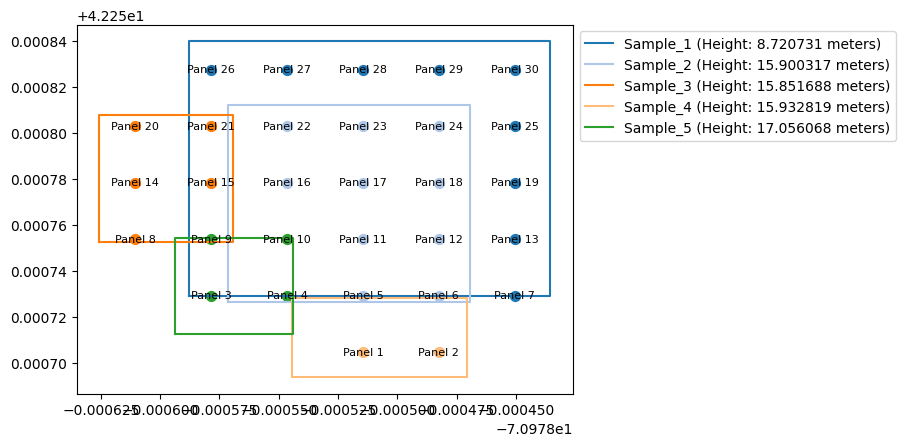

In [329]:

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd

# Assign panel numbers and colors
def assign_panel_numbers_and_colors(panel_centers, sample_bounding_boxes, sample_heights):
    panel_numbers = {}
    panel_colors = {}
    
    for i, panel_center in enumerate(panel_centers):
        lat, lon = panel_center
        assigned_sample = None
        highest_sample_height = -1
        color_index = -1

        for j, (sample_name, bounding_box) in enumerate(sample_bounding_boxes.items()):
            sw_lat, sw_lon, ne_lat, ne_lon = bounding_box
            if sw_lat <= lat <= ne_lat and sw_lon <= lon <= ne_lon:
                if sample_heights[j] > highest_sample_height:
                    assigned_sample = sample_name
                    highest_sample_height = sample_heights[j]
                    color_index = j

        if assigned_sample:
            panel_number = len(panel_numbers) + 1
            panel_numbers[panel_center] = panel_number
            color = cm.tab20(color_index)  
            panel_colors[panel_center] = color
    
    return panel_numbers, panel_colors

# Call the function
panel_numbers, panel_colors = assign_panel_numbers_and_colors(panel_centers, sample_bounding_boxes, sample_heights)

# Plotting
for panel_center, panel_number in panel_numbers.items():
    lat, lon = panel_center
    color = panel_colors.get(panel_center, 'blue')
    plt.scatter(lon, lat, c=[color], s=50)
    plt.annotate(f'Panel {panel_number}', (lon, lat), fontsize=8, color='black', ha='center', va='center')

# Plot sample bounding boxes with unique colors
for i, (sample_name, bounding_box) in enumerate(sample_bounding_boxes.items()):
    sw_lat, sw_lon, ne_lat, ne_lon = bounding_box
    color = cm.tab20(i)
    height = sample_heights[i]  # Extract the height for this sample
    plt.plot([sw_lon, ne_lon, ne_lon, sw_lon, sw_lon], [sw_lat, sw_lat, ne_lat, ne_lat, sw_lat], color=color, label=f'{sample_name} (Height: {height} meters)')

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [335]:
# Initialize a dictionary to store sunshine quantiles for each sample
sunshine_quantiles_dict = {}

# Loop through each sample and extract sunshine quantile information
for i, segment in enumerate(roofSegmentStats):
    stats = segment.get('stats', {})
    sunshine_quantiles = stats.get('sunshineQuantiles', [])
    sample_name = f'Sample_{i+1}'
    sunshine_quantiles_dict[sample_name] = sunshine_quantiles
#print(sunshine_quantiles_dict)

# Create a new column for average sunshine quantiles in panel_df
panel_df['Average Sunshine Quantile'] = 0

# Loop through each row in panel_df to assign the average sunshine quantile
for index, row in panel_df.iterrows():
    sample_name = row['Sample Assigned']
    sunshine_quantiles = sunshine_quantiles_dict.get(sample_name, [])
    
    if sunshine_quantiles:
        average_sunshine_quantile = sum(sunshine_quantiles) / len(sunshine_quantiles)
        panel_df.loc[index, 'Average Sunshine Quantile'] = average_sunshine_quantile


    

{'Sample_1': [544, 894, 1200, 1221, 1229, 1235, 1241, 1246, 1252, 1278, 1521], 'Sample_2': [684, 1051, 1199, 1233, 1249, 1259, 1267, 1273, 1283, 1297, 1424], 'Sample_3': [696, 1187, 1236, 1255, 1266, 1280, 1293, 1311, 1350, 1398, 1515], 'Sample_4': [757, 1072, 1094, 1469, 1503, 1512, 1516, 1517, 1518, 1519, 1523], 'Sample_5': [988, 1202, 1232, 1252, 1261, 1267, 1273, 1281, 1299, 1370, 1511], 'Sample_6': [514, 782, 960, 1158, 1235, 1299, 1319, 1342, 1366, 1377, 1413]}


/tmp/ipykernel_3762/4075939581.py:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '1363.6363636363637' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  panel_df.loc[index, 'Average Sunshine Quantile'] = average_sunshine_quantile


In [339]:
panel_df = panel_df.sort_values(by=['Average Sunshine Quantile'], ascending=False)
panel_df.head(10)



,Panel Number,Sample Assigned,Panel Center,Panel Height,Average Sunshine Quantile
0,1,Sample_4,"(42.250704675, -70.97851448333334)",15.932819,1363.636364
1,2,Sample_4,"(42.250704675, -70.97848245)",15.932819,1363.636364
2,3,Sample_5,"(42.250729225, -70.97857855)",17.056068,1266.909091
3,4,Sample_5,"(42.250729225, -70.97854651666667)",17.056068,1266.909091
8,9,Sample_5,"(42.250753775, -70.97857855)",17.056068,1266.909091
9,10,Sample_5,"(42.250753775, -70.97854651666667)",17.056068,1266.909091
7,8,Sample_3,"(42.250753775, -70.97861058333334)",15.851688,1253.363636
20,21,Sample_3,"(42.250802875000005, -70.97857855)",15.851688,1253.363636
19,20,Sample_3,"(42.250802875000005, -70.97861058333334)",15.851688,1253.363636
13,14,Sample_3,"(42.250778325, -70.97861058333334)",15.851688,1253.363636


In [341]:
# sum of average sunshine quantiles
sum(panel_df['Average Sunshine Quantile'])
print (f"sum of average sunshine quantiles: {sum(panel_df['Average Sunshine Quantile'])}")
print (f"total number of panels: {len(panel_df)}")

sum of average sunshine quantiles: 36601.63636363636
total number of panels: 30
